In [1]:
# emotion_classifier_training.ipynb

# Load required packages
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import joblib

# Load Dataset
df = pd.read_csv("emotion_dataset_2.csv")

# Display the first few rows of the dataframe
df.head()


,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [2]:
# Clean text function: Remove user handles and stopwords
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

# Display the cleaned data
df.head()

# Value counts of emotions
df['Emotion'].value_counts()


Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

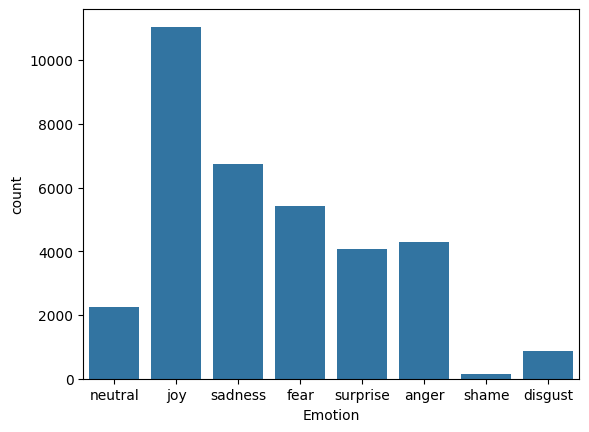

In [3]:
# Check the number of samples for each emotion
sns.countplot(x='Emotion', data=df)


In [4]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

# Split data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=42)


In [5]:
# Build Pipeline: CountVectorizer and LogisticRegression
pipe_lr = Pipeline([
    ('cv', CountVectorizer()),       # Converts text into a bag of words
    ('lr', LogisticRegression())     # Logistic Regression for classification
])

# Train the model
pipe_lr.fit(x_train, y_train)


C:\Users\1divy\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

Accuracy: 0.62
              precision    recall  f1-score   support

       anger       0.63      0.55      0.59      1283
     disgust       0.62      0.18      0.28       292
        fear       0.74      0.65      0.69      1645
         joy       0.62      0.75      0.67      3311
     neutral       0.59      0.73      0.65       675
     sadness       0.58      0.57      0.57      2015
       shame       0.82      0.78      0.80        36
    surprise       0.55      0.43      0.48      1181

    accuracy                           0.62     10438
   macro avg       0.64      0.58      0.59     10438
weighted avg       0.62      0.62      0.61     10438



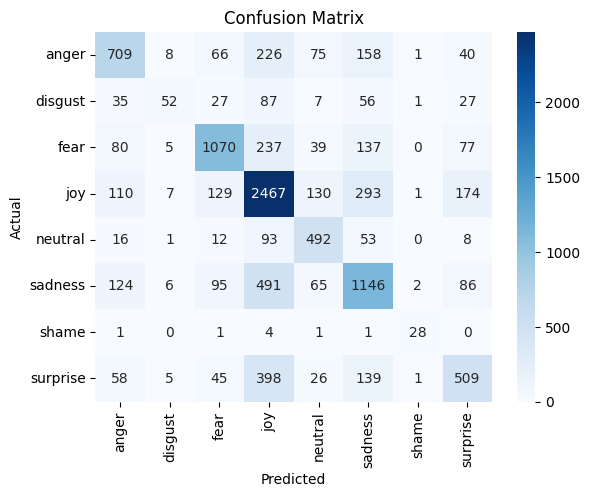

In [6]:
# Evaluate the model using the test data
y_pred = pipe_lr.predict(x_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix (for visualizing performance per class)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=pipe_lr.classes_, yticklabels=pipe_lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [7]:
# Save the trained model to a file
joblib.dump(pipe_lr, "emotion_classifier_pipe_lr_with_new_emotions.pkl")
print("Model saved to emotion_classifier_pipe_lr_with_new_emotions.pkl")


Model saved to emotion_classifier_pipe_lr_with_new_emotions.pkl


In [8]:
# Load the saved model
loaded_model = joblib.load("emotion_classifier_pipe_lr_with_new_emotions.pkl")

# Sample text for prediction
sample_text = "I'm feeling very nervous about this situation"

# Predict the emotion for the sample text
prediction = loaded_model.predict([sample_text])
print(f"Predicted Emotion: {prediction[0]}")

# Predict the probability of each emotion
prediction_proba = loaded_model.predict_proba([sample_text])
proba_df = pd.DataFrame(prediction_proba, columns=loaded_model.classes_)
print("Prediction Probabilities:")
print(proba_df.T)


Predicted Emotion: fear
Prediction Probabilities:
                 0
anger     0.018847
disgust   0.011682
fear      0.869150
joy       0.067800
neutral   0.005856
sadness   0.023781
shame     0.000809
surprise  0.002074


In [9]:
import pickle

# Assume `pipe_lr` is your pre-trained model (e.g., a machine learning model)

# Saving the model
with open('emotion_classifier_pipe_lr_with_new_emotions.pkl', 'wb') as file:
    pickle.dump(pipe_lr, file)
    print("Model saved successfully.")

# Loading the model
with open('emotion_classifier_pipe_lr_with_new_emotions.pkl', 'rb') as file:
    pipe_lr = pickle.load(file)
    print("Model loaded successfully.")

# Now you can use 'pipe_lr' for making predictions or further tasks.



Model saved successfully.
Model loaded successfully.


In [10]:
# Make a prediction
exl = "this book was so interested it made me happy"
pipe_lr.predict([exl])


array(['joy'], dtype=object)

In [11]:
pipe_lr.predict_proba([exl])

array([[1.26498352e-02, 1.46806866e-02, 2.67284167e-02, 7.55762343e-01,
        3.18812709e-04, 1.59227220e-01, 1.99184125e-04, 3.04335010e-02]])